In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

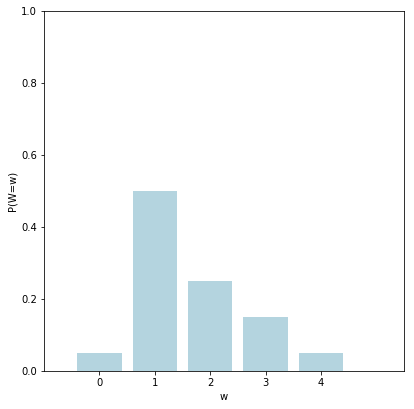

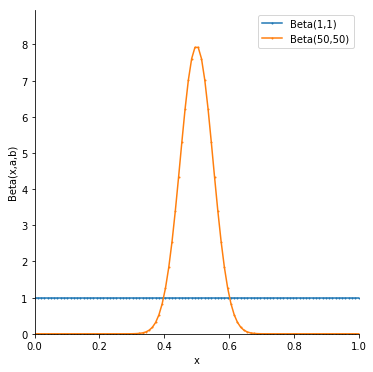

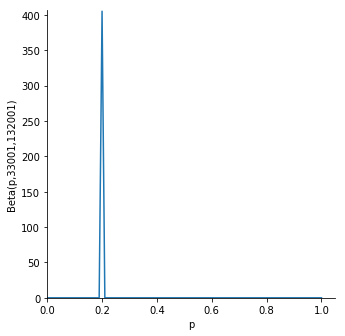

In [12]:
# Get a list with relative frequencies corresponding to W
n = []
n.append(0)
n.extend([1]*10+[2]*5+[3]*3+[4]*1)

# Get a dictionary of relative frequencies
d = {}
for i in range(5):
    v = n.count(i)
    d[i] = v/len(n)
    
# Plot the distribution for W
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0.1,0.1,1,1])

s = sns.barplot(list(d.keys()), list(d.values()),color='lightblue')
s.set_xlim(-1,5.5)
s.set_ylim(0,1)
s.set_ylabel('P(W=w)')
s.set_xlabel('w')
fig.savefig(r'.\Theory\Images\Wpdf.png')

# Plot the distribution for the Beta distribution (Beta(1,1) and Beta(50,50))
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0.1,0.1,0.9,0.9])

x = np.linspace(0,1,100)
y=np.array([stats.beta.pdf(i,1,1) for i in x])
z = np.array([stats.beta.pdf(i,50,50) for i in x])
axes.plot(x, y, '-o',ms=1,label='Beta(1,1)')
axes.plot(x, z, '-o',ms=1,label='Beta(50,50)')
axes.set_xlabel('x')
axes.set_ylabel('Beta(x,a,b)')
axes.legend()
axes.set_xlim(0,1)
axes.set_ylim(0,stats.beta.pdf(0.5,50,50)+1)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
fig.savefig(r'.\Theory\Images\Beta.png')

# Plot the Beta(33001,132001) distribution
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0.2,0.2,0.8,0.8])
x = np.linspace(0,0.2,20)
x = np.concatenate([x,np.linspace(0.2,1,80)])
z = np.array([stats.beta.pdf(i,33001,132001) for i in x])
axes.plot(x, z, '-o',ms=0,label='Beta(33001,132001)')
axes.set_xlabel('p')
axes.set_ylabel('Beta(p,33001,132001)')
#axes.legend()
axes.set_xlim(0,1.05)
axes.set_ylim(0,stats.beta.pdf(0.2,33001,132001)+2)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
#axes.set_yticklabels([])
#axes.set_yticks([])
fig.savefig(r'.\Theory\Images\Beta2.png')

Total number of heads = 3202
Total number of coin flips = 16536


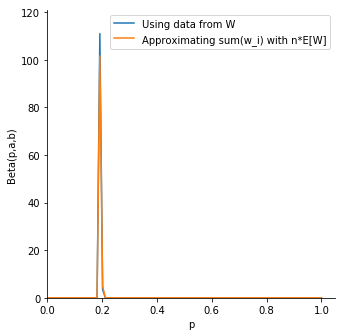

In [13]:
# Set seed
np.random.seed(101)

# Build W by concatenation of lists
w = []
w.append(0)
w.extend([1]*10+[2]*5+[3]*3+[4]*1)

# Set the probability of heads from a coin flip
p = 0.2

# Set the number of games
n = 10000

# Initialise the total number of heads obtained
y_outcome = 0

# Get n samples from w
w_outcome = np.random.choice(w,size=n)

# For each w, flip the coin that many times
y_outcome = [np.sum(stats.bernoulli.rvs(p,size=this_w)) for this_w in w_outcome]

y_sum = sum(y_outcome)
w_sum = sum(w_outcome)

print('Total number of heads = {}'.format(y_sum))
print('Total number of coin flips = {}'.format(w_sum))

# Get figure object
fig = plt.figure(figsize=(5, 5))

# Get aces object
axes = fig.add_axes([0.2,0.2,0.8,0.8])

# Create a numpy array of 100 points equally spaced
x = np.linspace(0,1,100)

# Create a numpy array of the posterior distribution using actual observed values of W
y = np.array([stats.beta.pdf(i,1+y_sum,1-y_sum+w_sum) for i in x])

# Create a numpy array of the posterior distribution by estimating sum(W) with it's expected value
z = np.array([stats.beta.pdf(i,1+y_sum,1-y_sum+n*1.65) for i in x])

# Plot onto the axes
axes.plot(x, y, '-o',ms=0,label='Using data from W')
axes.plot(x, z, '-o',ms=0,label='Approximating sum(w_i) with n*E[W]')

# Set the axis labels
axes.set_xlabel('p')
axes.set_ylabel('Beta(p,a,b)')

# Show legend
axes.legend()

# Set axis limits
axes.set_xlim(0,1.05)
axes.set_ylim(0,max(y.max(),z.max())+10)

# Remove some borders
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

fig.savefig(r'.\Theory\Images\BetaSimulation.png')